In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
sns.set(style="whitegrid")

In [12]:
basic_df = pd.read_csv('/content/Bank_Basic.csv')

In [13]:
account_df = pd.read_csv('/content/Bank_Account.csv')

In [14]:
activity_df = pd.read_csv('/content/Bank_Activity.csv')

In [15]:
df_temp = pd.merge(basic_df, account_df, on="Transaction_ID", how="inner")

In [16]:
df = pd.merge(df_temp, activity_df, on="Transaction_ID", how="inner")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Transaction_ID   10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
df.describe()

,CustomerId,CreditScore,Age,Transaction_ID,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5000.50000,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2886.89568,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,1.00000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,2500.75000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5000.50000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7500.25000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10000.00000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [19]:
print(df['Gender'].value_counts())
print(df['Geography'].value_counts())
print(df['HasCrCard'].value_counts())
print(df['IsActiveMember'].value_counts())
print(df['NumOfProducts'].value_counts())
print(df['Exited'].value_counts())

Gender
Male      5457
Female    4543
Name: count, dtype: int64
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
HasCrCard
1    7055
0    2945
Name: count, dtype: int64
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64
Exited
0    7963
1    2037
Name: count, dtype: int64


In [20]:
bins = [0, 500, 600, 700, 850]
labels = ['<500', '500–600', '600–700', '700+']
df['CreditScore_Bin'] = pd.cut(df['CreditScore'], bins=bins, labels=labels)

In [21]:
churn_by_score = df.groupby('CreditScore_Bin')['Exited'].agg(['count', 'sum'])
churn_by_score['Churn_Rate'] = churn_by_score['sum'] / churn_by_score['count'] * 100

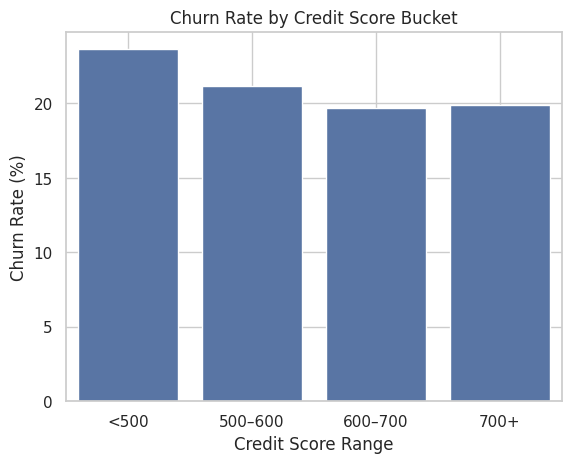

In [22]:
sns.barplot(x=churn_by_score.index, y=churn_by_score['Churn_Rate'])
plt.title("Churn Rate by Credit Score Bucket")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Credit Score Range")
plt.grid(True)
plt.show()

In [23]:
bins = [0, 30, 40, 50, 100]
labels = ['<30', '30–40', '40–50', '50+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [24]:
churn_by_age = df.groupby('Age_Group')['Exited'].agg(['count', 'sum'])
churn_by_age['Churn_Rate'] = churn_by_age['sum'] / churn_by_age['count'] * 100

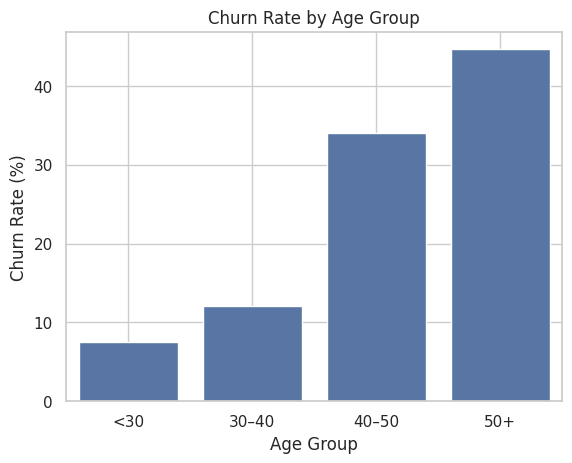

In [25]:
sns.barplot(x=churn_by_age.index, y=churn_by_age['Churn_Rate'])
plt.title("Churn Rate by Age Group")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Age Group")
plt.grid(True)
plt.show()

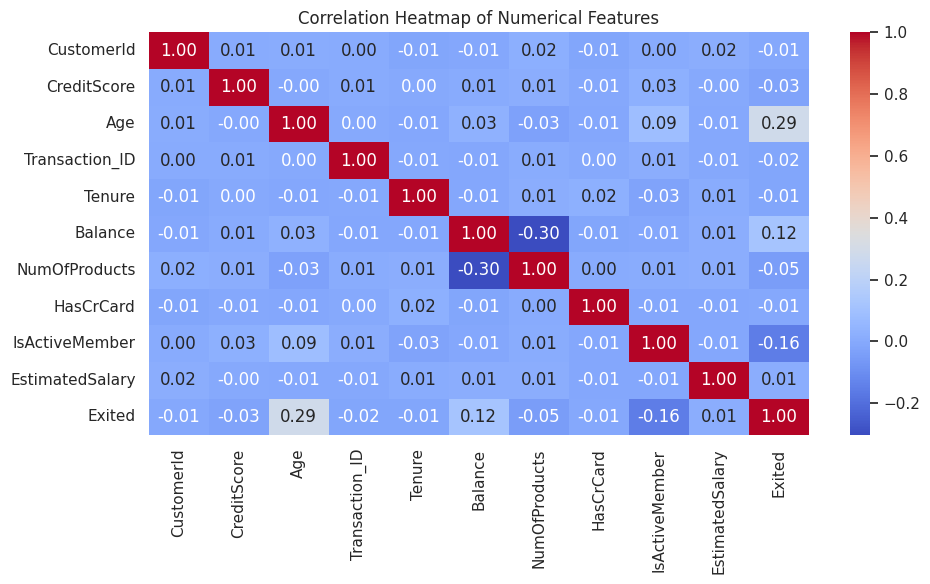

In [29]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

In [52]:
df_encoded = df.copy()

df_encoded = df_encoded.drop(columns=['CreditScore_Bin', 'Age_Group'], errors='ignore')

df_encoded = pd.get_dummies(df_encoded, columns=['Geography', 'Gender'], drop_first=True)

X = df_encoded.drop(columns=['CustomerId', 'Surname', 'Exited', 'Transaction_ID'], errors='ignore')
y = df_encoded['Exited']


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.859
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1595
           1       0.76      0.44      0.56       405

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000

Confusion Matrix:
 [[1540   55]
 [ 227  178]]


In [53]:
importances = clf.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

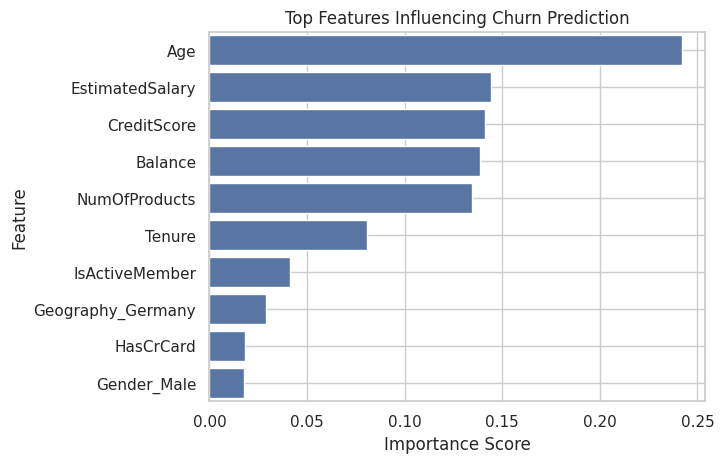

In [39]:
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title("Top Features Influencing Churn Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(True)
plt.show()

In [46]:
sample = X_test.iloc[0:1]
prediction = clf.predict(sample)
print("Prediction:", "Will Leave" if prediction[0] == 1 else "Will Stay")

Prediction: Will Stay


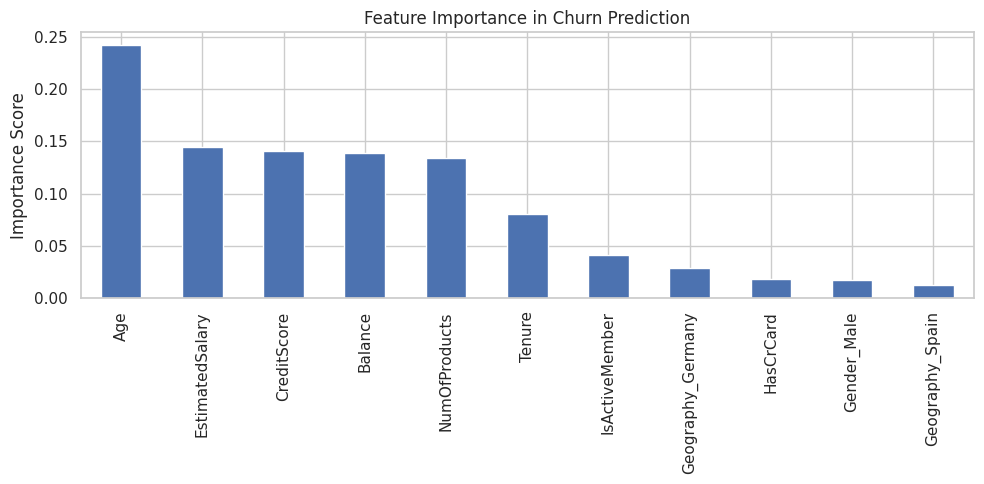

In [47]:
feat_imp.plot(kind='bar', figsize=(10, 5))
plt.title("Feature Importance in Churn Prediction")
plt.ylabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
import joblib
joblib.dump(clf, 'churn_model.pkl')

['churn_model.pkl']

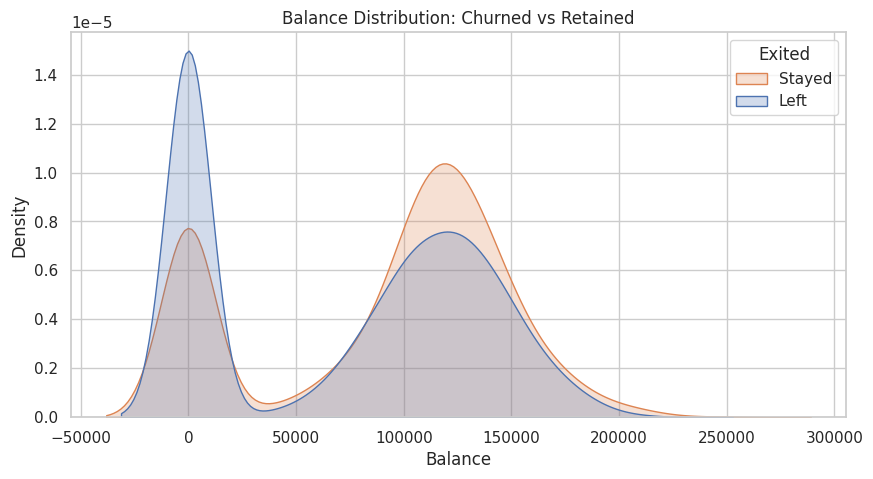

In [50]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='Balance', hue='Exited', fill=True, common_norm=False)
plt.title('Balance Distribution: Churned vs Retained')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend(title='Exited', labels=['Stayed', 'Left'])
plt.grid(True)
plt.show()